# I. Load data

In [16]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import matplotlib.ticker as mtick
import numpy as np


# Fetch the CSV file inside the assignment folder in the PFDA-courseware repository & read it into a pandas DataFra
csv_url = 'https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download'

df = pd.read_csv(csv_url)

# Change pandas' settings so all cols in the DataFrame are displayed
pd.set_option('display.max_columns', None)

# Display the first five rows
df.head()

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer


# II. Basic exploration

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          1000 non-null   int64 
 1   User Id        1000 non-null   object
 2   First Name     1000 non-null   object
 3   Last Name      1000 non-null   object
 4   Sex            1000 non-null   object
 5   Email          1000 non-null   object
 6   Phone          1000 non-null   object
 7   Date of birth  1000 non-null   object
 8   Job Title      1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


# III. Data wrangling & engineering

In [18]:
# Create Domain column & verify output
df['Domain'] = df['Email'].str.split('@').str[1]

print(df['Domain'].unique())

['example.org' 'example.net' 'example.com']


In [43]:
# Given that pie charts require a numerical column, create a new DF with counts of each unique domain value
domain_counts = df['Domain'].value_counts().reset_index()
domain_counts.columns = ['Domain', 'Counts']

domain_counts


,Domain,Counts
0,example.org,341
1,example.com,339
2,example.net,320


# IV. Data visualisation

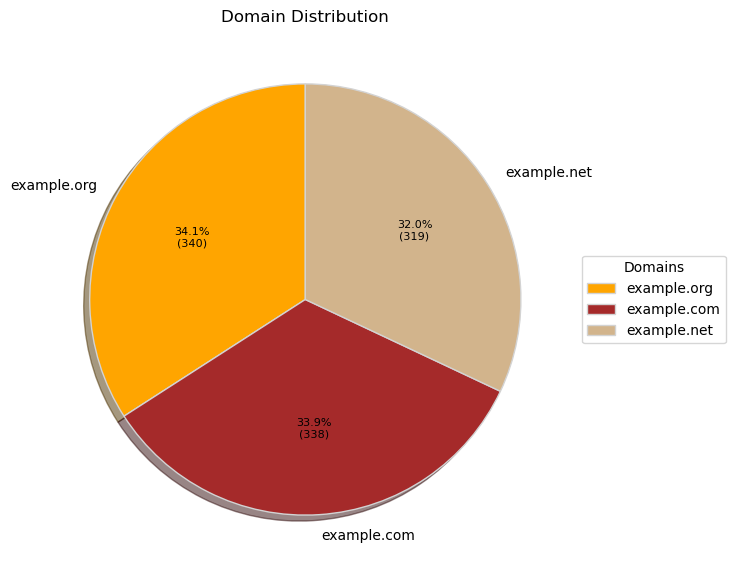

In [57]:
# Create lists with the values tyo be ploted as in https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
domains = domain_counts['Domain'].tolist()
data = domain_counts['Counts'].tolist()

# Explode the slice with the highest domain count by finding the max value from Counts
# https://stackoverflow.com/questions/68434100/finding-max-value-from-list-and-assigning-it-to-explode-value-in-pie-chart-matpl
explode = [0.1 if i == max(data) else 0 for i in data]  

# Define colors for each slice
# https://matplotlib.org/stable/gallery/color/named_colors.html
colors = ("orange", "brown", "tan")

# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "lightgrey"}

# Function to format both percentage and absolute values for each slice
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating the plot
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),  # Custom function for percentage and count
                                  labels=domains,
                                  shadow=True,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  textprops=dict(color="black"))

# Adding legend with detailed labels
ax.legend(wedges, domains,
          title="Domains",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Customize text inside wedges
plt.setp(autotexts, size=8)
ax.set_title("Domain Distribution")

plt.show()


---
### End